# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [2]:
# Normalzing images

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



In [3]:
# Converting to one hot encoding

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
# Class names for one hot encoding:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

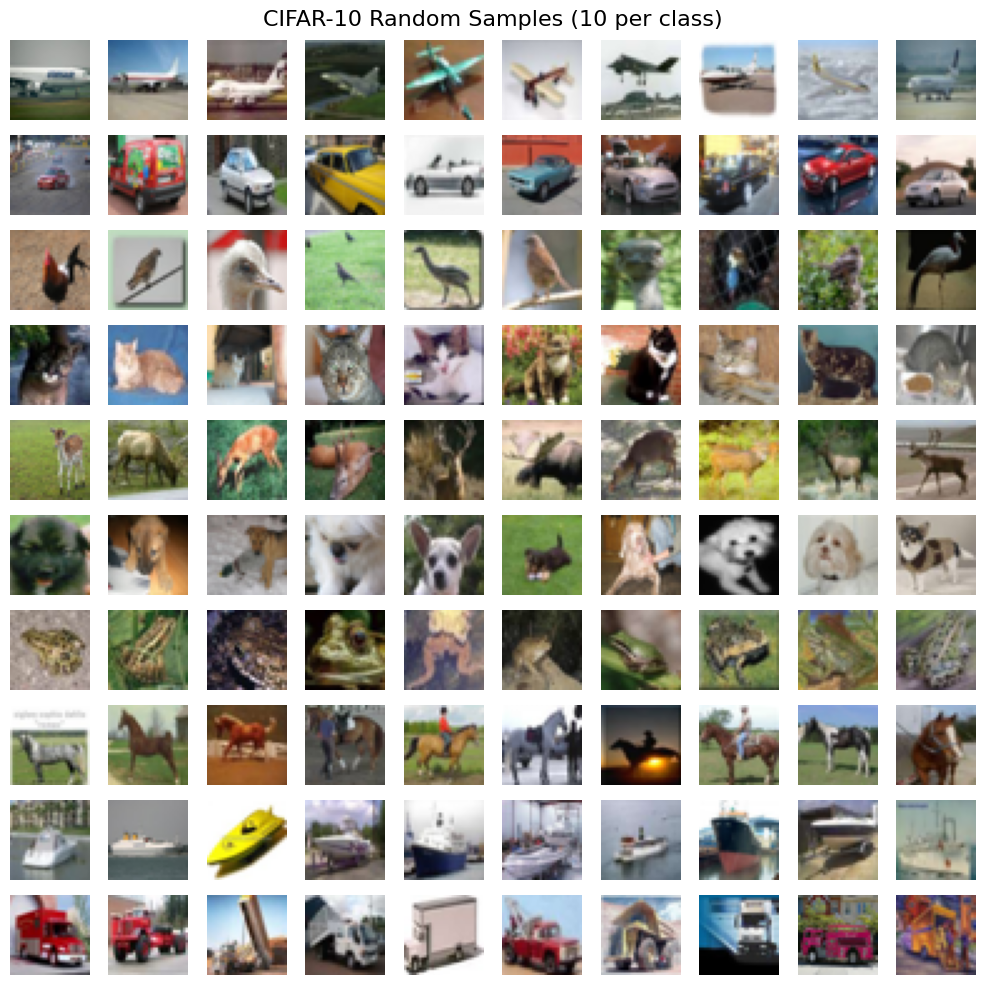

In [5]:
# Visualization

import numpy as np
import matplotlib.pyplot as plt

# This is a function to visualize samples
def plot_cifar10_samples(x, y, class_names):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10))
    fig.suptitle("CIFAR-10 Random Samples (10 per class)", fontsize=16)

    for i in range(10):

        indices = np.where(y == i)[0]
        selected_indices = np.random.choice(indices, 10, replace=False) # selecting 10 random images

        for j, idx in enumerate(selected_indices):
            axes[i, j].imshow(x[idx])
            axes[i, j].axis('off')


            if j == 0:
                axes[i, j].set_ylabel(class_names[i], fontsize=10, rotation=90, labelpad=10)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

plot_cifar10_samples(x_train, y_train.argmax(axis=1), class_names)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [6]:
from keras.backend import clear_session
clear_session()

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), #number of filters in the convolutional later, 32, size is 3,3.
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary() #displaying model summare

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [8]:
# Compiling model with categorical_cross for loss and SGD optimizer, checkin for accuracy.

model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.1652 - loss: 2.2603 - val_accuracy: 0.2595 - val_loss: 2.1418
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2725 - loss: 2.1067 - val_accuracy: 0.3124 - val_loss: 2.0096
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3090 - loss: 1.9892 - val_accuracy: 0.3298 - val_loss: 1.9275
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3381 - loss: 1.9105 - val_accuracy: 0.3496 - val_loss: 1.8716
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3560 - loss: 1.8572 - val_accuracy: 0.3619 - val_loss: 1.8266
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3672 - loss: 1.8196 - val_accuracy: 0.3577 - val_loss: 1.8243
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3821 - loss: 1.7887 - val_accuracy: 0.3836 - val_loss: 1.7637
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3928 - loss: 1.7588 - val_accuracy: 0.3984 - v

*   Plot the cross entropy loss curve and the accuracy curve

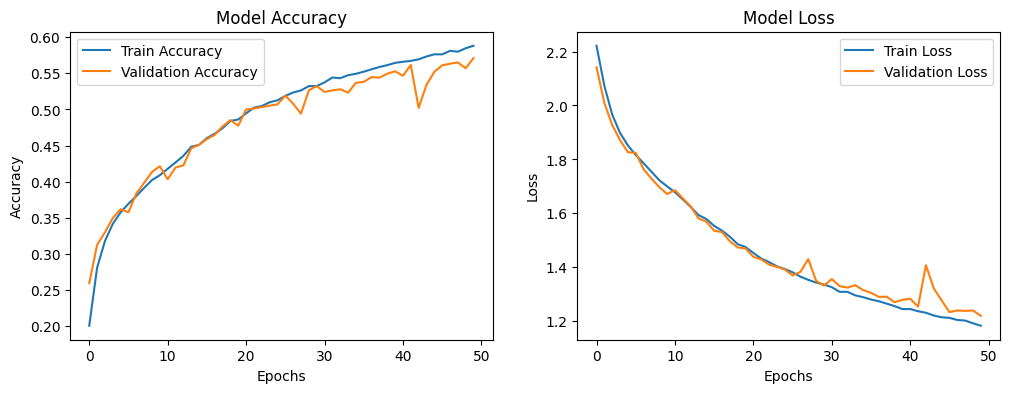

In [9]:
# Plotting loss curve and accuracy.

import matplotlib.pyplot as plt

# Function to plot training.
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # accuracy
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    #loss
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    plt.show()


plot_training_history(history)


# My thoughts on the plots

As can be seen in the plots above, is that the accuracy slowly increases as the number of Epochs in a linear progressive line. Validation accuracy sometimes struggles to follow the training accuracy line, maybe tuning of the learning rate could improve this aspect. There is a sign of increase of accuracy as the number of epochs go up. Suggesting that it has not yet overfitted.

When considering the plot to the right, the model loss, especially after epoch 10, is steadily decreasing. The validation loss sometimes jumps up and down, but generally, the training and validation loss are decreasing together, which is a good.

# Key take-aways

- I believe a larger number of epochs could improve this model, and maybe adjusting the learning rate slightly.



## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

model = models.Sequential([
    Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# flatten and dense

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,062,836 (4.05 MB)

 Trainable params: 1,062,836 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [13]:
# compiling the model

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.0983 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.0988 - loss: 2.3026 - val_accuracy: 0.1037 - val_loss: 2.3018
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1064 - loss: 2.3016 - val_accuracy: 0.1327 - val_loss: 2.3009
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1303 - loss: 2.3009 - val_accuracy: 0.1432 - val_loss: 2.3001
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1392 - loss: 2.3001 - val_accuracy: 0.1440 - val_loss: 2.2993
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1405 - loss: 2.2993 - val_accuracy: 0.1448 - val_loss: 2.2984
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1427 - loss: 2.2982 - val_accuracy: 0.1459 - val_loss: 2.2971
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1421 - loss: 2.2968 - val_accuracy: 0.1461 -

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


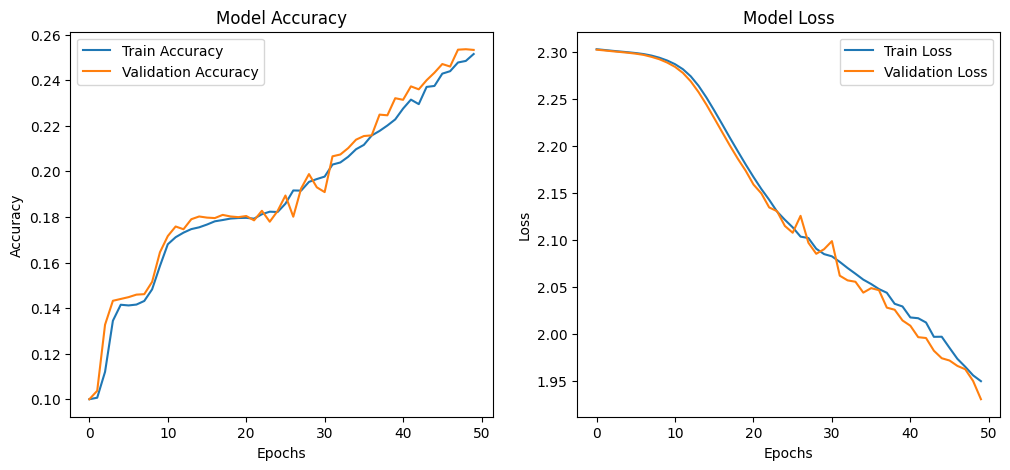

In [14]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot
    ax[0].plot(history.history['accuracy'], label='Train Accuracy')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Loss plot
    ax[1].plot(history.history['loss'], label='Train Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()

# Call function to plot graphs
plot_training_history(history)


**Comment on the observation**

The earlier model reached ~55% accuracy, while the VGG model only reached ~25%.

The VGG model might be too deep for this dataset.
Learning is too slow → SGD optimizer might not be right.


...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


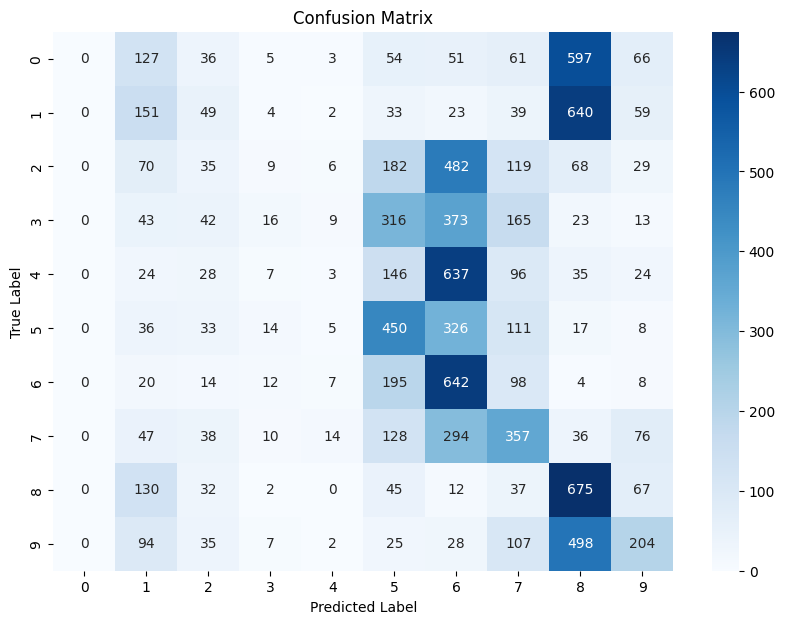

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions on the test set
y_pred = model.predict(x_test)

# Convert probability outputs into class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class
y_true = np.argmax(y_test, axis=1)  # True labels

# confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# plotting the matrix

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



# My comments on the matrix

Class 8 was predicted most often as 1, 9, 0. There is some confusion there.


Class 6 was predicted as 5, 195 times, and predicted as 7, 98 times.

class 4 was predicted as 6 almost 637 times.

**By reflecting on what the class labels stand for, then it makes more sense.**

Class 8, which is the category "ships" is often confused with "airplanes", "automobiles" and "trucks"

Class 6, which is the "frog", is often confused with "dogs" and "horses".

class 4, which is "deer" was predicted as "frog" a lot of times.






*    Print the test accuracy for the trained model.

In [16]:
# Test accuracy

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy", test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.2533 - loss: 1.9305
Test Accuracy 0.2533000111579895


In general the model is not performing well on unseen data, with high loss value and los accuracy it confuses many classes with others. Suggesting a deeper network does not necessarily help. It may need longer training time(more epochs) to be able to perform better.

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [17]:
from keras.backend import clear_session
clear_session()

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# input
model.add(layers.Input(shape=(64, 64, 3)))

# 1 conv
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# 2 conv
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# 3 conv
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# flat and connect
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [20]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow.image as tf_image

# loading dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# resizing images
x_train = tf_image.resize(x_train, [64, 64]).numpy()
x_test = tf_image.resize(x_test, [64, 64]).numpy()

# normalizing values
x_train, x_test = x_train / 255.0, x_test / 255.0

# convert to hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# training the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_test, y_test))


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.1054 - loss: 2.3007 - val_accuracy: 0.1047 - val_loss: 2.2935
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 403ms/step - accuracy: 0.1083 - loss: 2.2886 - val_accuracy: 0.1627 - val_loss: 2.2602
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 390ms/step - accuracy: 0.1755 - loss: 2.2295 - val_accuracy: 0.2568 - val_loss: 2.1006
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 394ms/step - accuracy: 0.2418 - loss: 2.1036 - val_accuracy: 0.2953 - val_loss: 2.0020
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 395ms/step - accuracy: 0.2815 - loss: 2.0116 - val_accuracy: 0.2839 - val_loss: 1.9730
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 396ms/step - accuracy: 0.3155 - loss: 1.9494 - val_accuracy: 0.3227 - val_loss: 1.8744
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 395ms/step - accuracy: 0.3323 - loss: 1.8815 - val_accuracy: 0.3092 - val_loss: 1.9183
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 397ms/step - accuracy: 0.3558 - loss: 1.8215 - val_accura

In [22]:
# predictions

import numpy as np

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


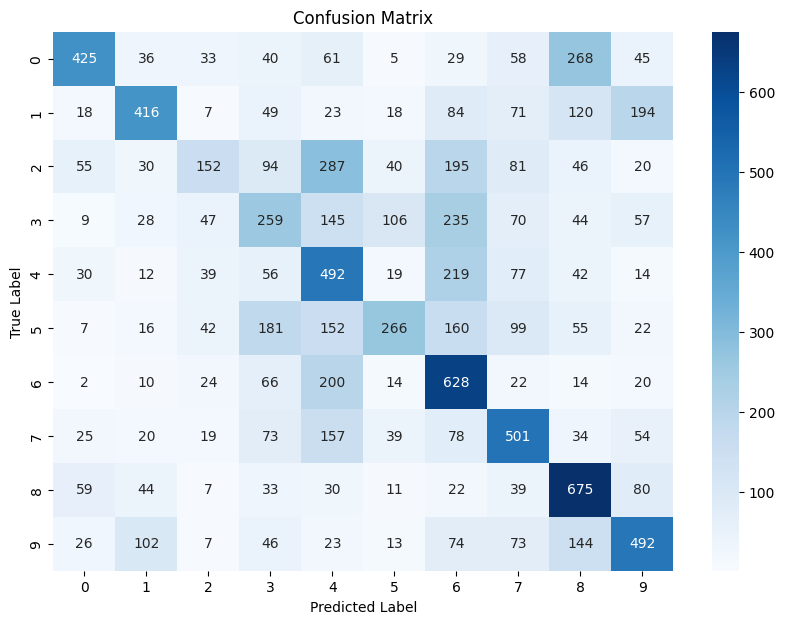

In [23]:
# plotting the conf matrix:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy", test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.4306 - loss: 1.6295
Test Accuracy 0.43059998750686646


# Conclusions

- The new VGG model performed better, reaching an accuracy of 43%.

- Some obervations from the conf matrix:

Class 0 (airplane) is often thought to be class 8(ship).

Class 1(automobile) often gets confused with class9(truck)

Class 3 (cats) are often misclassified as dogs
(poor kitties)

Frog and ships are often well identified.

Deers and Horses have overlaps, which makes sense because they have a similar shape.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions, such as sigmoid, softmax, relu, are used to learn complex patterns. Allows for stacking of multiple layers and makes it easier for models to differentiate complex features.

_

2 - Key Differences between sigmoid and softmax:

- Sigmoid is best for binary classification.

- Softmax is used in multi-class situations because it normalizes outputs to sum to 1.

So when having multiple classes, use softmax. When dealing with a binary situation with only two classes, use sigmoid.


3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Use categorical crossentropy when dealing with multiple classes and binary cross when dealing with only two classes.

Categorical crossentropy is best for situations like image classification, with a lot of different classes.

The binary crossentropy is best used when dealing with two classes, hence the name binary.
_
